Importy

In [26]:
import numpy as np

from math import log2, ceil
from typing import Tuple

Funkcje pomocnicze

In [27]:
def generate_matrix(n_cols: int, n_rows: int):
    # Uniform używa rozkładu jednostajnego ciągłego
    return np.random.uniform(low=0.1, high=0.01, size=(n_rows, n_cols))

In [28]:
generate_matrix(10, 10)

array([[0.04927913, 0.03704572, 0.01228288, 0.02619434, 0.06428243,
        0.0357802 , 0.0330776 , 0.09724744, 0.01670379, 0.09295118],
       [0.03264955, 0.01519227, 0.05072551, 0.07697377, 0.09816859,
        0.04929715, 0.04749002, 0.08346761, 0.07649956, 0.06594478],
       [0.04057735, 0.04686567, 0.07614091, 0.02314276, 0.04569485,
        0.01512284, 0.03004399, 0.02478144, 0.0360916 , 0.08226447],
       [0.03226417, 0.05520435, 0.05941801, 0.01820041, 0.01173993,
        0.08115716, 0.05133889, 0.03643815, 0.03931487, 0.09357332],
       [0.06026812, 0.03333879, 0.04720169, 0.08655067, 0.01413938,
        0.01787775, 0.09609963, 0.0499307 , 0.06829556, 0.06470413],
       [0.09798068, 0.03900877, 0.06200823, 0.09629887, 0.02259059,
        0.03790485, 0.01360644, 0.086891  , 0.08897027, 0.08912059],
       [0.04037133, 0.09191879, 0.01090648, 0.05313083, 0.09502068,
        0.0551503 , 0.0321444 , 0.05248458, 0.05530706, 0.0754915 ],
       [0.02186671, 0.05338187, 0.0453354

In [29]:
class Counter:
    """
    Zliczanie wykonywanych operacji zmiennoprzecinkowych
    """
    def __init__(self) -> None:
        self.operation_counter = 0

    def count_operations(func):
        def wrapper(self, *args, **kwargs):
            A, B = args
            result = func(self, A, B)
            self.operation_counter += A.size
            return result
        return wrapper
    
    @count_operations
    def add(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A + B

    @count_operations
    def sub(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A - B

    @count_operations
    def mul(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A * B

    @count_operations
    def div(self, A: np.ndarray, B: np.ndarray) -> np.ndarray:
        return A / B

    def print_counts(self) -> None:
        print(f"Number of flops: {self.operation_counter}")

Test

In [30]:
counter = Counter()

result = np.zeros([1, 3])

mat1 = np.array([1, 2, 3])
mat2 = np.array([1, 2, 3])
print(mat1)
print(mat2)

result += counter.add(mat1, mat2)

[1 2 3]
[1 2 3]


In [31]:
counter.print_counts()
print(result)

Number of flops: 3
[[2. 4. 6.]]


Funkcje pomocnicze

In [32]:
def resize_matrix_to_2n(A: np.ndarray, B: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Zmiana wielkości macierzy
    """
    size_A: Tuple[int, int] = A.shape
    size_B: Tuple[int, int] = B.shape
    new_height: int = 0
    new_width: int = 0

    # Height
    if size_A[0] > size_B[0]:
        new_height = find_next_power_of_2(size_A[0])
    else:
        new_height = find_next_power_of_2(size_B[0])

    # Width
    if size_A[1] > size_B[1]:
        new_width = find_next_power_of_2(size_A[1])
    else:
        new_width = find_next_power_of_2(size_B[1])

    # Wypełnienie zerami
    new_A = np.pad(
        A, [(0, new_height - size_A[0]), (0, new_width - size_A[1])], mode="constant"
    )
    new_B = np.pad(
        B, [(0, new_height - size_B[0]), (0, new_width - size_B[1])], mode="constant"
    )
    return new_A, new_B

def split(array: np.ndarray, n_rows: int, n_cols: int) -> Tuple:
    """Split a matrix into sub-matrices"""
    r, h = array.shape
    return (
        array.reshape(h // n_rows, n_rows, -1, n_cols)
        .swapaxes(1, 2)
        .reshape(-1, n_rows, n_cols)
    )

def find_next_power_of_2(number: int) -> int:
    """
    Szukanie kolejnej potęgi 2
    """
    return 1 if number == 0 else 2 ** ceil(log2(number))

Metoda tradycyjna

In [33]:
def traditional_method(A: np.ndarray, B: np.ndarray, counter: Counter):
    add = counter.add
    mul = counter.mul
    
    rows_A, cols_A = A.shape
    rows_B, cols_B = B.shape
    
    result = np.zeros((rows_A, cols_B))

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                result[i][j] = add(result[i][j], mul(A[i][k], B[k][j]))
    
    return result


In [34]:
A = generate_matrix(8, 8)
B = generate_matrix(8, 8)

print(A)
print(B)

counter = Counter()

result_trad = traditional_method(A, B, counter)
result_numpy = A @ B

print(result_trad)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_trad, result_numpy)}")

counter.print_counts()

[[0.06847685 0.09242674 0.03593041 0.07979935 0.02696744 0.05260456
  0.06357499 0.03165026]
 [0.07597613 0.05561496 0.03398503 0.07315033 0.07696341 0.08967335
  0.019453   0.01181389]
 [0.02125536 0.07639281 0.045048   0.02970394 0.07347588 0.03700074
  0.02208814 0.08896282]
 [0.09975328 0.08651687 0.04531915 0.08617574 0.05268663 0.05778726
  0.09326506 0.01747105]
 [0.05275128 0.02317551 0.06790681 0.02506031 0.02989539 0.06199303
  0.06851    0.03634735]
 [0.04290439 0.06546221 0.01066589 0.04424274 0.01854827 0.09575353
  0.04819883 0.09228516]
 [0.03972752 0.09200275 0.07061502 0.09241367 0.09709997 0.07365989
  0.05751348 0.02310272]
 [0.06967913 0.0555624  0.09577211 0.01832118 0.05268774 0.0337162
  0.03290372 0.04784483]]
[[0.06322776 0.01746802 0.07433302 0.08484982 0.03892547 0.0530036
  0.07434045 0.06763021]
 [0.08707845 0.03390725 0.06815657 0.06612816 0.06851413 0.03813852
  0.05509436 0.08437869]
 [0.08726338 0.01297713 0.07866511 0.09706102 0.06686537 0.08937582
  0

Algorytm Bineta

In [35]:
def binet_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    mul = counter.mul
    
    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        C11 = add(
            binet_core_algorithm(A11, B11, counter),
            binet_core_algorithm(A12, B21, counter),
        )
        C12 = add(
            binet_core_algorithm(A11, B12, counter),
            binet_core_algorithm(A12, B22, counter),
        )     
        C21 = add(
            binet_core_algorithm(A21, B11, counter),
            binet_core_algorithm(A22, B21, counter),
        )
        
        C22 = add(
            binet_core_algorithm(A21, B12, counter),
            binet_core_algorithm(A22, B22, counter),
        )

        return np.concatenate(
            [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
            axis=0,
        )
    
    else:
        return mul(A, B)

def binet_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = binet_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Bineta

In [36]:
A = generate_matrix(8, 8)
B = generate_matrix(8, 8)

print(A)
print(B)

counter = Counter()

result_binet = binet_algorithm(A, B, counter)
result_numpy = A @ B

print(result_binet)
print(result_numpy)

print(f"Are the results close: {np.allclose(result_binet, result_numpy)}")

counter.print_counts()

[[0.07374326 0.04378949 0.07878374 0.01556261 0.0305617  0.0421347
  0.05299685 0.08592514]
 [0.05398264 0.02828774 0.01606108 0.06864392 0.03300005 0.02357766
  0.02569097 0.07824282]
 [0.01142609 0.06292885 0.09415046 0.09781047 0.07577598 0.0856092
  0.05005053 0.04764445]
 [0.01560404 0.06195881 0.0558669  0.09919641 0.0365413  0.02393659
  0.04326407 0.0444737 ]
 [0.09732417 0.09217225 0.06553685 0.05904379 0.02501387 0.06412631
  0.0228347  0.08835922]
 [0.09781657 0.09912934 0.05975761 0.03885857 0.06931242 0.05390678
  0.08772514 0.07603904]
 [0.02152323 0.02301472 0.08096731 0.07230533 0.07367168 0.08801349
  0.02295858 0.03109538]
 [0.01880328 0.07041359 0.08208487 0.0535314  0.05114766 0.09564365
  0.07134235 0.0264223 ]]
[[0.06489724 0.01188876 0.08292736 0.04856731 0.0806501  0.07520101
  0.01113252 0.04740131]
 [0.07524891 0.06154253 0.06203767 0.09949072 0.06191891 0.02346354
  0.07649008 0.06292923]
 [0.06341394 0.02917859 0.07652613 0.07807325 0.03038735 0.03049101
  0

Algorytm Strassena

In [37]:
def strassen_core_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    add = counter.add
    sub = counter.sub
    mul = counter.mul

    if A.size > 1:
        split_at = A.shape[0] // 2
        A11, A12, A21, A22 = split(A, split_at, split_at)
        B11, B12, B21, B22 = split(B, split_at, split_at)

        P1 = strassen_core_algorithm(add(A11, A22), add(B11, B22), counter)
        P2 = strassen_core_algorithm(add(A21, A22), B11, counter)
        P3 = strassen_core_algorithm(A11, sub(B12, B22), counter)
        P4 = strassen_core_algorithm(A22, sub(B21, B11), counter)
        P5 = strassen_core_algorithm(add(A11, A12), B22, counter)
        P6 = strassen_core_algorithm(sub(A21, A11), add(B11, B12), counter)
        P7 = strassen_core_algorithm(sub(A12, A22), add(B21, B22), counter)

        C11 = add(sub(add(P1, P4), P5), P7)
        C12 = add(P3, P5)
        C21 = add(P2, P4)
        C22 = add(add(sub(P1, P2), P3), P6)

        return np.concatenate(
                    [np.concatenate([C11, C12], axis=1), np.concatenate([C21, C22], axis=1)],
                    axis=0,
                )
    else:
        return mul(A, B)

def strassen_algorithm(A: np.ndarray, B: np.ndarray, counter: Counter) -> np.ndarray:
    new_A, new_B = resize_matrix_to_2n(A, B)
    C = strassen_core_algorithm(new_A, new_B, counter)
    C = C[~np.all(C == 0, axis=1)]
    C = C[:, ~np.all(C == 0, axis=0)]
    return C
    

Test algorytmu Strassena

In [38]:
A = generate_matrix(8, 8)
B = generate_matrix(8, 8)

print(A)
print(B)

counter = Counter()

result_strassen = strassen_algorithm(A, B, counter)
result_numpy = A @ B

print(result_strassen)
print(result_numpy)
print(result_strassen.shape)
# print(f"Are the results close: {np.allclose(result_strassen, result_numpy)}")

counter.print_counts()

[[0.03435768 0.04075362 0.07756796 0.05587304 0.06223411 0.04957673
  0.06328711 0.05616246]
 [0.01563537 0.07319597 0.05160383 0.08539957 0.01191353 0.07397711
  0.02551763 0.01476982]
 [0.04569909 0.07485656 0.06300762 0.0499224  0.08811164 0.0283736
  0.06397983 0.03097006]
 [0.05667718 0.09107368 0.07701716 0.08729109 0.04457045 0.08327185
  0.03744026 0.06881327]
 [0.05226199 0.04959832 0.0227044  0.08304319 0.02197578 0.08158666
  0.02283381 0.05625705]
 [0.07472607 0.01175404 0.05436706 0.08301421 0.03925452 0.02644565
  0.01665758 0.03751313]
 [0.08447382 0.09912744 0.01141723 0.06538531 0.01910503 0.056192
  0.07372309 0.08201038]
 [0.02746841 0.04771084 0.03132272 0.06470694 0.03499964 0.03775452
  0.08012526 0.06520375]]
[[0.07433888 0.06786828 0.04149146 0.05327891 0.04731125 0.06547263
  0.08016581 0.0283525 ]
 [0.01060037 0.02306747 0.08054382 0.02669057 0.0187205  0.0254693
  0.09449671 0.0456736 ]
 [0.01565012 0.02365844 0.02348728 0.08567358 0.03447109 0.07633497
  0.0

In [41]:
import matplotlib.pyplot as plt
from time import time
from matplotlib.ticker import FormatStrFormatter
from typing import List
from tqdm import tqdm

times_trad: List[float] = []
times_binet: List[float] = []
times_strassen: List[float] = []

flops_trad: List[int] = []
flops_binet: List[int] = []
flops_strassen: List[int] = []

power_basis = list(range(2, 10))
powers = [2**k for k in power_basis]

np.random.seed(42)

In [42]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    traditional_method(A, B, counter)

    total_time: float = time() - start_time

    times_trad.append(total_time)
    flops_trad.append(counter.operation_counter)

100%|██████████| 8/8 [05:35<00:00, 41.89s/it]


268435456


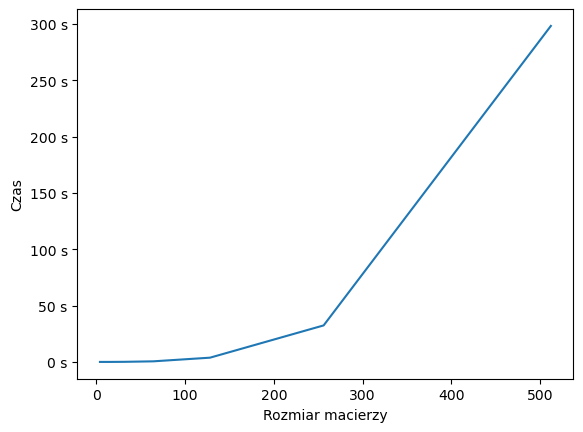

In [43]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_trad)

print(counter.operation_counter)

268435456


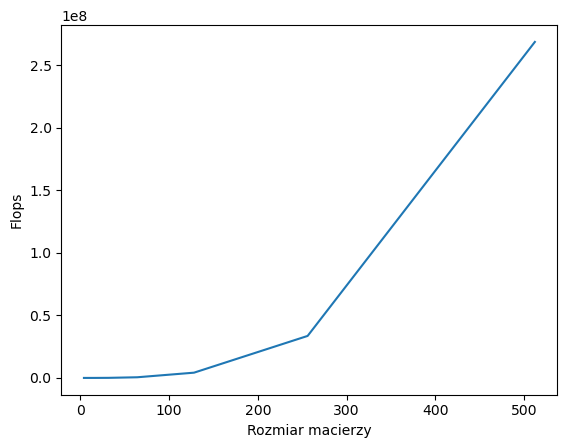

In [44]:
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Flops")
plt.plot(powers, flops_trad)

print(counter.operation_counter)

In [ ]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    binet_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_binet.append(total_time)
    flops_binet.append(counter.operation_counter)

100%|██████████| 8/8 [07:08<00:00, 53.53s/it]


268173312


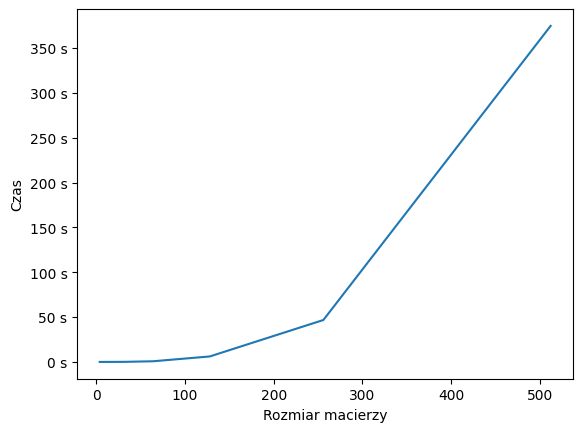

In [ ]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_binet)

print(counter.operation_counter)

In [ ]:
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Flops")
plt.plot(powers, flops_binet)

print(counter.operation_counter)

In [ ]:
for k in tqdm(power_basis):
    A = np.random.rand(2**k, 2**k)
    B = np.random.rand(2**k, 2**k)

    counter = Counter()
    start_time: float = time()

    strassen_algorithm(A, B, counter)

    total_time: float = time() - start_time

    times_strassen.append(total_time)
    flops_strassen.append(counter.operation_counter)

100%|██████████| 8/8 [03:55<00:00, 29.46s/it]


In [ ]:
print(times_strassen)

[0.0027573108673095703, 0.005704641342163086, 0.01666092872619629, 0.08771181106567383, 0.5952401161193848, 4.148430347442627, 29.262978315353394, 201.56494140625]


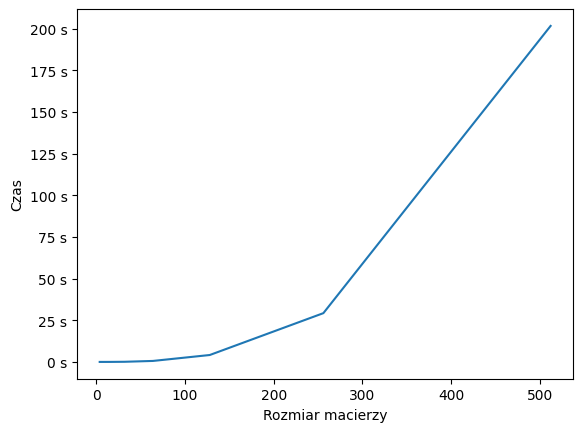

In [ ]:
plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%d s"))
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Czas")
plt.plot(powers, times_strassen)


In [ ]:
plt.xlabel("Rozmiar macierzy")
plt.ylabel("Flops")
plt.plot(powers, flops_strassen)

In [ ]:
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {times_trad[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta: {times_binet[-1]:.2f} sekund")
print(f"Czas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena: {times_strassen[-1]:.2f} sekund")

Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 177.09 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta: 378.46 sekund
Czas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena: 208.07 sekund


In [ ]:
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą tradycyjną: {flops_trad[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Bineta: {flops_binet[-1]}")
print(f"Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach {powers[-1]}x{powers[-1]} metodą Strassena: {flops_strassen[-1]}")

Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą tradycyjną: 268435456
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Bineta: 268173312
Ilość operacji zmniennoprzecinkowych wykonanych podczas przemnażania dwóch macierzy o wymiarach 512x512 metodą Strassena: 280902385
